<a href="https://colab.research.google.com/github/effepivi/gvxr-demos/blob/main/12-move-detector/12-move-detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install -q ipympl

    from google.colab import output
    output.enable_custom_widget_manager()

    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -q --force-reinstall "/content/drive/MyDrive/Colab Notebooks/gvxr-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl"
else:
    !pip install -q --force-reinstall gvxr=>2.0.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00
Mounted at /content/drive
Processing ./drive/MyDrive/Colab Notebooks/gvxr-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl


In [2]:
%matplotlib widget

import math, os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
if not os.path.exists("img"):
    os.mkdir("img")

In [4]:
from gvxrPython3 import gvxr
from gvxrPython3 import json2gvxr
gvxr.useLogFile()

# Create an OpenGL context
# MS Windows
if os.name == "nt":
    print("Creating an OpenGL context using EGL is not possible on Microsoft Windows")
    print("A window will be created but not displayed")
    gvxr.createWindow(0, False, "OPENGL");
# MacOS
elif str(os.uname()).find("Darwin") >= 0:
    print("Creating an OpenGL context using EGL is not possible on MacOS")
    print("A window will be created but not displayed")
    gvxr.createWindow(0, False, "OPENGL");
# GNU/Linux
else:
    print("Create an OpenGL context using EGL")
    gvxr.createWindow(0, 1, "EGL");


K3D is not install, you won't be able to visualise the 3D scene using k3D
spekpy is not install, you won't be able to load a beam spectrum using spekpy
xpecgen is not install, you won't be able to load a beam spectrum using xpecgen
SimpleGVXR 2.0.7 (2023-10-23T20:01:58) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.7 (2023-10-23T20:01:57) [Compiler: GNU g++] on Linux
Create an OpenGL context using EGL


In [5]:
def printDetector():
    print("Detector position:", gvxr.getDetectorPosition("cm"), "cm")
    print("Detector up vector:", gvxr.getDetectorUpVector())
    print("Detector right vector:", gvxr.getDetectorRightVector())
    print("Detector size:", gvxr.getDetectorSize("cm"), "cm")
    print("Detector number of pixels:", gvxr.getDetectorNumberOfPixels())
    # print("Detector pixel spacing:", gvxr.getDetectorNumberOfPixels())

In [6]:
current_folder = str(globals()['_dh'][0])

In [7]:
gvxr.setDetectorPosition(90.0, 0.0, 0.0, "cm");
gvxr.setDetectorUpVector(0, 0, -1);
gvxr.setDetectorNumberOfPixels(1640, 1320);
gvxr.setDetectorPixelSize(1.5, 1.5, "mm");

gvxr.setSourcePosition(-300.0,  0.0, 0.0, "cm");
gvxr.usePointSource();
gvxr.setMonoChromatic(150, "keV", 10000);

right_vector = gvxr.getDetectorRightVector()

In [8]:
printDetector()

Detector position: (90.0, 0.0, 0.0) cm
Detector up vector: (0.0, 0.0, -1.0)
Detector right vector: (-0.0, 1.0, 0.0)
Detector size: (246.0, 198.0) cm
Detector number of pixels: (1640, 1320)


In [9]:
# Locate the sample STL file from the package directory
path = os.path.dirname(gvxr.__file__)
fname = path + "/welsh-dragon-small.stl"

gvxr.loadMeshFile("Dragon", fname, "cm")

gvxr.moveToCentre("Dragon");
gvxr.applyCurrentLocalTransformation("Dragon");

gvxr.setElement("Dragon", "C")

In [10]:
x_ray_image_1 = np.array(gvxr.computeXRayImage()).astype(np.single)
gvxr.displayScene()

In [13]:
# gvxr.useLighing(True)
# gvxr.useWireframe(False)
# gvxr.setZoom(6000)

angle = 0.0#math.pi / 2.0
rotation_matrix_x = np.array([ 1, 0, 0, 0,
                               0, math.cos(angle), -math.sin(angle), 0,
                               0, math.sin(angle),  math.cos(angle), 0,
                               0, 0, 0, 1])

rotation_matrix_z = np.array([ math.cos(angle), -math.sin(angle), 0, 0,
                               math.sin(angle),  math.cos(angle), 0, 0,
                               0, 0, 1, 0,
                               0, 0, 0, 1])

rotation_matrix_x.shape = [4,4]
rotation_matrix_z.shape = [4,4]

transformation_matrix = np.identity(4)

transformation_matrix = np.matmul(rotation_matrix_x, transformation_matrix)
transformation_matrix = np.matmul(rotation_matrix_z, transformation_matrix)

gvxr.setSceneRotationMatrix(transformation_matrix.flatten())

# gvxr.setWindowBackGroundColour(1, 1, 1)
gvxr.setColor("Dragon", 1, 0.5, 0.5, 1);

gvxr.displayScene()

In [14]:
screenshot1 = (255 * np.array(gvxr.takeScreenshot())).astype(np.uint8)

In [15]:
gvxr.setDetectorRightVector(1, 1, 0)
printDetector()
x_ray_image_2 = np.array(gvxr.computeXRayImage()).astype(np.single)
gvxr.displayScene()
screenshot2 = (255 * np.array(gvxr.takeScreenshot())).astype(np.uint8)

Detector position: (90.0, 0.0, 0.0) cm
Detector up vector: (0.0, 0.0, -1.0)
Detector right vector: (0.7071067690849304, 0.7071067690849304, 0.0)
Detector size: (246.0, 198.0) cm
Detector number of pixels: (1640, 1320)


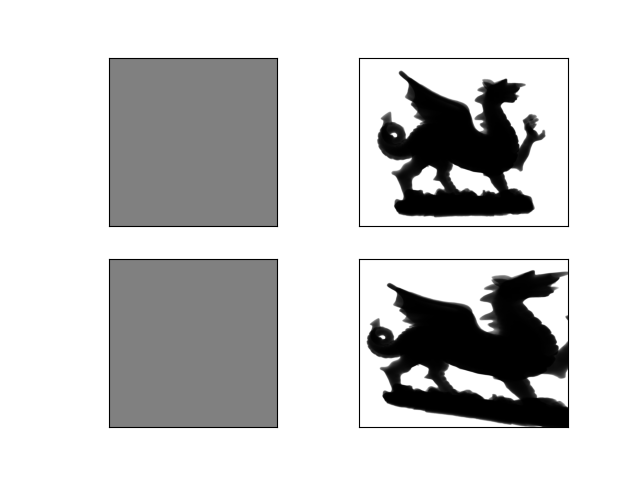

In [16]:
fig, axs = plt.subplots(2, 2)

axs[0,0].imshow(screenshot1)
axs[0,1].imshow(x_ray_image_1, cmap="gray")

axs[1,0].imshow(screenshot2)
axs[1,1].imshow(x_ray_image_2, cmap="gray")


for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("img/not_perpendicular.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [17]:
gvxr.setDetectorPosition(90.0, 0.0, 0.0, "cm");
gvxr.setDetectorRightVector(right_vector[0], right_vector[1], right_vector[2])
gvxr.displayScene()

In [18]:
gvxr.setColour("Dragon", 0.5, 0.7, 0, 1)
gvxr.setWindowBackGroundColour(1, 1, 1);

# gvxr.setColor("Dragon", 1, 0.5, 0.5, 1);
gvxr.invertNormalVectors("Dragon")
gvxr.computeXRayImage();
gvxr.displayScene()

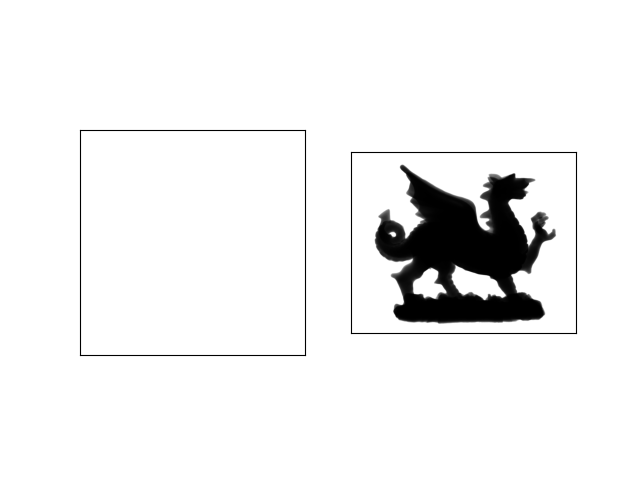

In [19]:
fig, anim_axs = plt.subplots(1, 2)

img1 = anim_axs[0].imshow(screenshot1)
img2 = anim_axs[1].imshow(x_ray_image_1, cmap="gray")

for ax in anim_axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

x = np.linspace(-math.pi, math.pi, 50)

def animate(i):
    gvxr.setSourcePosition(-300.0, 15 * math.sin(i), 0.0, "cm");
    xray = np.array(gvxr.computeXRayImage(), dtype=np.single)
    gvxr.displayScene()
    screenshot = (255 * np.array(gvxr.takeScreenshot())).astype(np.uint8)

    img1.set_data(screenshot)
    img2.set_data(xray)
    return


ani = animation.FuncAnimation(fig, animate, repeat=False, frames=len(x))

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('img/anim.gif', writer=writer)

plt.show()